#### This notebook has 4 parts: 

    
1. Statistical analysis of the dataset. We will analyze some basic information of the Titanic dataset (mean, standard deviation, correlation etc.). This will give us an understanding of what are some of the important features of our prediction model. 


2. Visualization. We will use visualization libraries to directly show what is going in in this dataset. Numbers are hard to understand, but not graphs :p


3. Data cleaning and transformation. The dataset is not clean; it has lots of null values, redundant columns and data points that make no sense. Therefore, to have the best accuracy of our prediction model, we need to handle this properly.


4. Model building. We will use sklearn to test different algos, decide the best one, and further improve it.

Note: Until the date below, I am still updating this documentation and the code. Let me know if you have any ideas regrading how to improve this model. Cheers. 

Spet. 14, 2020,
Ronald Luo

In [1]:
# import library
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

## Part 1: Statistical analysis 

In [2]:
titanic = sns.load_dataset('titanic')

#### Investigate Dataset

Now that we have loaded our dataset, let's get a feel for what data our data looks like:

In [3]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


####      What we can see here is that, the Titanic dataset has both categorical and numerical data. The following is the descrption of this dataset copied from the web: 


survival:	Survival	0 = No, 1 = Yes
pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex:	Sex	
Age:	Age in years	
sibsp:	# of siblings / spouses aboard the Titanic	
parch:	# of parents / children aboard the Titanic	
ticket:	Ticket number	
fare:	Passenger fare	
cabin:	Cabin number	
embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

#### With such information, we can look at the dataset in more details 

In [4]:
## total rows and colums
titanic.shape

(891, 15)

In [5]:
## the basic stat of our columns, note that this only calculate the numerical data
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#count the number of survivors
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [7]:
#The columns that have missing data
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


## Linear regression
#### Based on the current data, we can do build some simple linear regression with One Covariate. 

### Note: as our dependent variable is only 1 & 0, linear regression is BY NO MEANS the proper model for our prediction, but just for your information, we can take a look at the performance

In [8]:
## liner regression using age
model = sm.OLS.from_formula("survived ~ age", data=titanic)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.271
Date:                Tue, 15 Sep 2020   Prob (F-statistic):             0.0391
Time:                        00:07:38   Log-Likelihood:                -503.28
No. Observations:                 714   AIC:                             1011.
Df Residuals:                     712   BIC:                             1020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4838      0.042     11.576      0.000       0.402       0.566
age           -0.0026      0.001     -2.067      0.039      -0.005      -0.000
==============================================================================
Omnibus:                     3171.380   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.965
Skew:                           0.380   Prob(JB):                     3.99e-26
Kurtosis:                       1.168   Cond. No.                         75.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
## liner regression using fare
model = sm.OLS.from_formula("survived ~ fare", data=titanic)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     63.03
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           6.12e-15
Time:                        00:07:38   Log-Likelihood:                -591.44
No. Observations:                 891   AIC:                             1187.
Df Residuals:                     889   BIC:                             1196.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3027      0.019     16.114      0.000       0.266       0.340
fare           0.0025      0.000      7.939      0.000       0.002       0.003
==============================================================================
Omnibus:                     5596.359   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.732
Skew:                           0.490   Prob(JB):                     4.98e-28
Kurtosis:                       1.443   Cond. No.                         70.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Hum, R-squared is only 0.006 and 0.066 using age and fare, terrible...
#### so let's just forget one-covariate liner regression, insteal let's look at how two or predictors will perform 

In [10]:
#The following model used age and sex as perdictors
model = sm.OLS.from_formula("survived ~ age + sex", data=titanic)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     146.0
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           7.77e-54
Time:                        00:07:38   Log-Likelihood:                -382.61
No. Observations:                 714   AIC:                             771.2
Df Residuals:                     711   BIC:                             784.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7805      0.039     19.792      0.000       0.703       0.858
sex[T.male]    -0.5469      0.032    -16.910      0.000      -0.610      -0.483
age            -0.0009      0.001     -0.858      0.391      -0.003       0.001
==============================================================================
Omnibus:                       15.657   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.304
Skew:                           0.360   Prob(JB):                     0.000288
Kurtosis:                       2.829   Cond. No.                         93.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Turned out that the R-squared is 0.291, well...this is acceptable, but we should go deeper than this

## Logistic regression

We now turn to regression models for binary outcome variables, let's go!

In [11]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [12]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
#calculate the odds of male & female. Not the most elegant code but anyway it works...

female_survived = len(titanic[(titanic['survived'] == 1) & (titanic['sex'] == 'female')])
female_total = len(titanic[titanic['sex'] == 'female']) 
female_survived_rate = female_survived / female_total
female_odds = female_survived_rate / (1 - female_survived_rate)


male_survived = len(titanic[(titanic['survived'] == 1) & (titanic['sex'] == 'male')])
male_total = len(titanic[titanic['sex'] == 'male']) 
male_survived_rate = male_survived / male_total
male_odds = male_survived_rate / (1 - male_survived_rate)

print('female_odds: ', female_odds)
print('\nmale_odds: ', male_odds)
print('\nodds_ratio: ', female_odds/male_odds)

female_odds:  2.876543209876542

male_odds:  0.23290598290598288

odds_ratio:  12.350662589194696


In [40]:
model = sm.GLM.from_formula("survived ~ sex", family=sm.families.Binomial(), data=titanic)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      710
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -374.78
Date:                Tue, 15 Sep 2020   Deviance:                       749.57
Time:                        00:09:12   Pearson chi2:                     712.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1141      0.144      7.734      0.000       0.832       1.396
sex[T.male]    -2.4676      0.185    -13.327      0.000      -2.831      -2.105
===============================================================================
"""

In [41]:
model = sm.GLM.from_formula("survived ~ sex + pclass + age", family=sm.families.Binomial(), data=titanic)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      708
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.35
Date:                Tue, 15 Sep 2020   Deviance:                       646.70
Time:                        00:10:12   Pearson chi2:                     765.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0466      0.502     10.052      0.000       4.063       6.031
sex[T.male]    -2.5134      0.207    -12.114      0.000      -2.920      -2.107
pclass         -1.2848      0.139     -9.226      0.000      -1.558      -1.012
age            -0.0372      0.008     -4.861      0.000      -0.052      -0.022
===============================================================================
"""

## Part 2: visualization

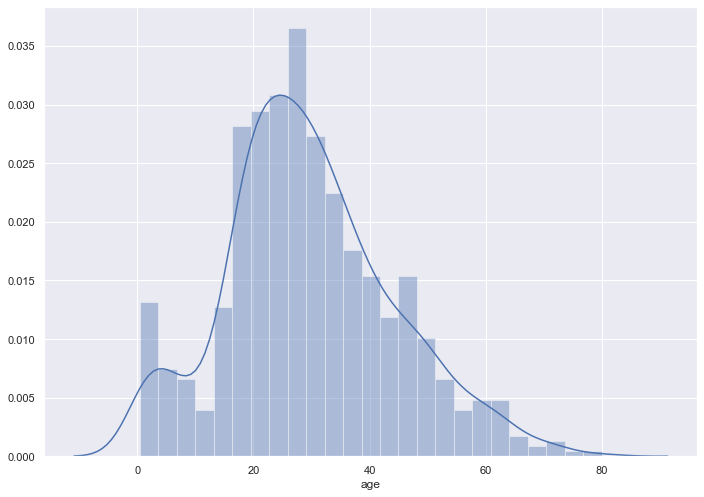

In [14]:
# First, let's look at the distribuion of the age
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(titanic['age'], bins = 25)
plt.show()

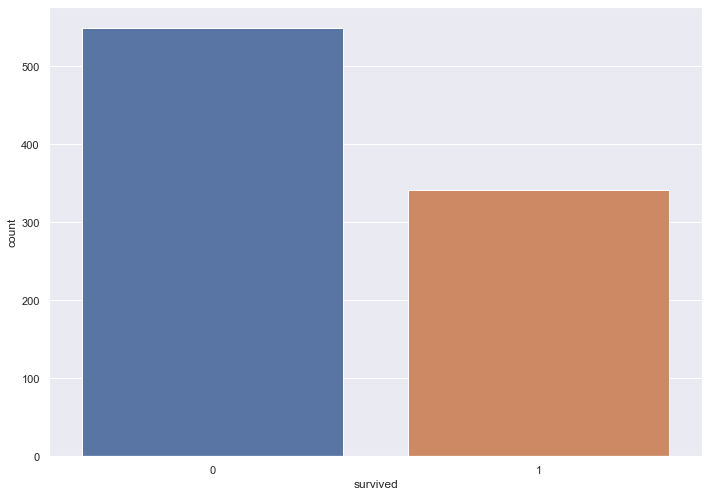

In [15]:
#visualize the count of survivors
sns.countplot(titanic['survived'])

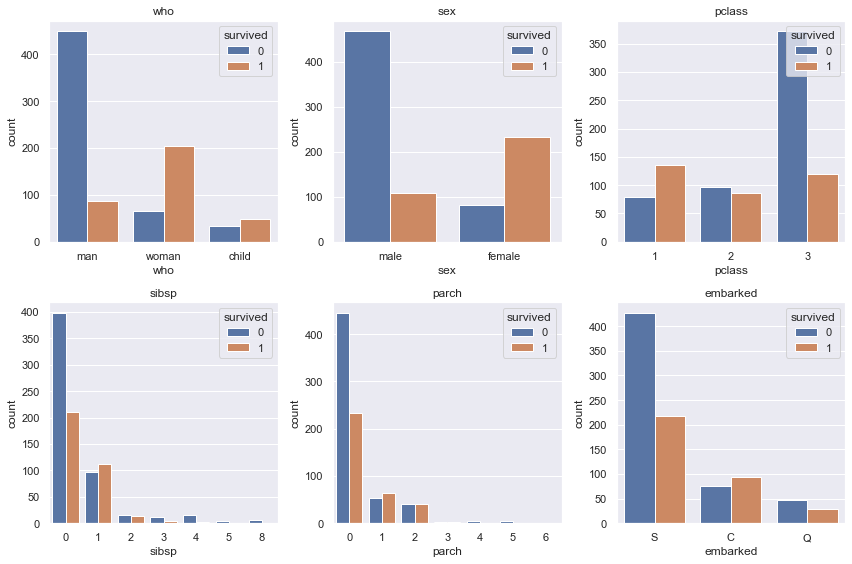

In [16]:
#visualize the count for columns 'who' 'sex' 'sibsp' 'pclass''parch' 'embarked'
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 2
n_cols = 3

#the subplot grid and figure size
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols *4, n_rows*4))
  
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index to go through the number of columns 
        ax = axs[r][c] #show there to position each sub plot
        sns.countplot(titanic[cols[i]], hue = titanic['survived'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title = 'survived', loc = 'upper right')
        
plt.tight_layout()

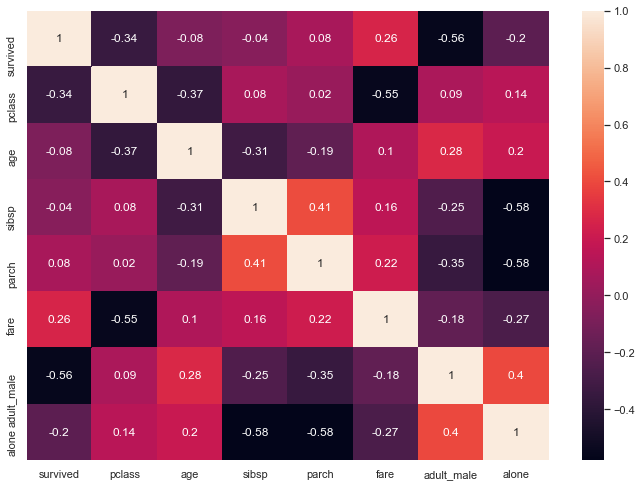

In [17]:
correlation_matrix = titanic.corr().round(2)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [18]:
#Look at survive rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [19]:
#SURVIVAL RATE BY SEX AND CLASS
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


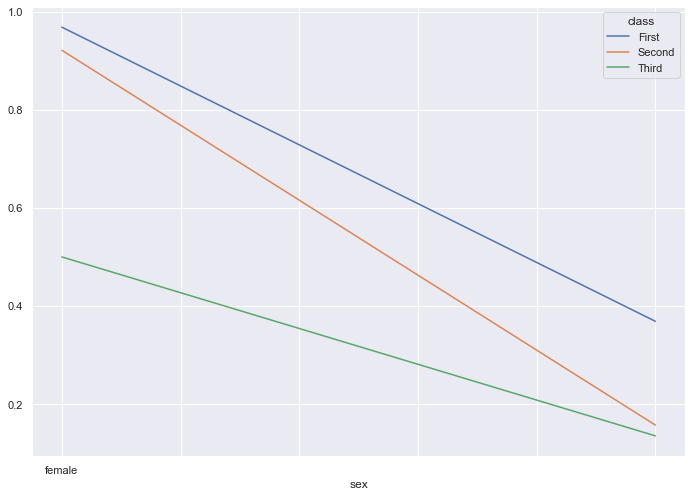

In [20]:
#SURVIVAL RATE BY SEX AND CLASS
titanic.pivot_table('survived',index='sex',columns='class').plot()

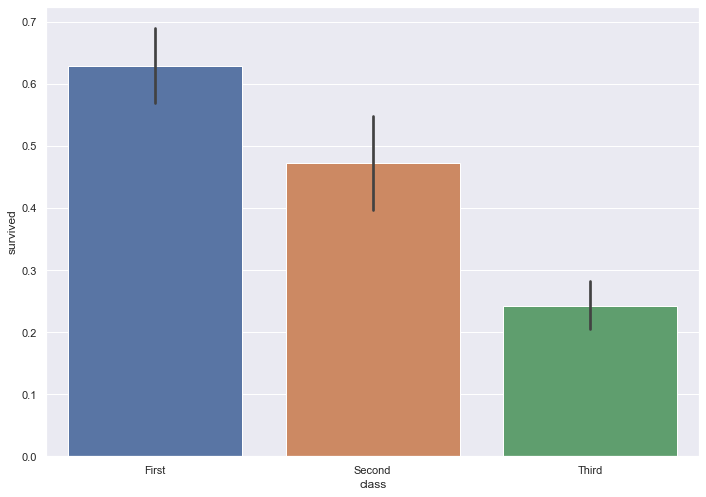

In [21]:
#plot the survial rate of each class
sns.barplot(x='class',y='survived',data=titanic)

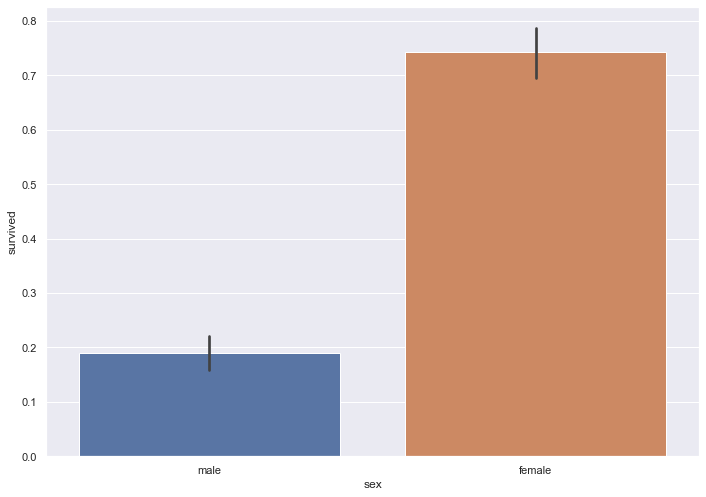

In [22]:
#plot the survial rate of each class
sns.barplot(x='sex',y='survived',data=titanic)

In [23]:
age = pd.cut(titanic['age'],[0,18,30,50,80])
titanic.pivot_table('survived', ['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 30]  0.958333  0.900000  0.500000
       (30, 50]  0.972973  0.925926  0.272727
       (50, 80]  1.000000  0.666667  1.000000
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 30]  0.428571  0.027027  0.147541
       (30, 50]  0.448980  0.114286  0.126761
       (50, 80]  0.192308  0.083333  0.000000

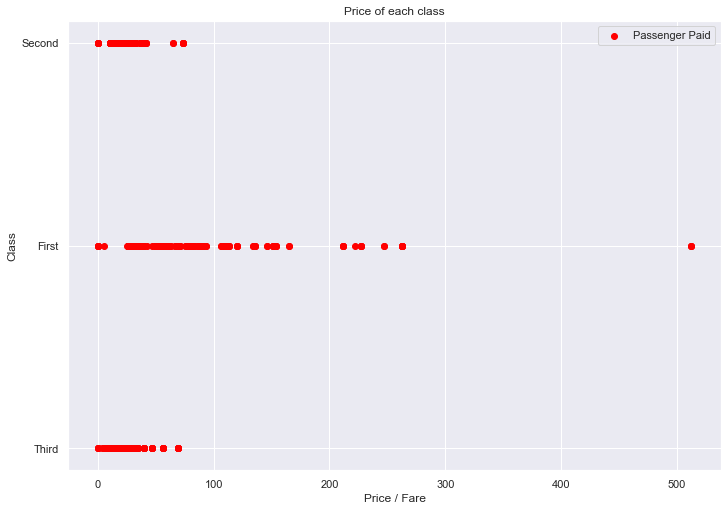

In [24]:
#plot the prices paid of each class
plt.scatter(titanic['fare'], titanic['class'], color='red',label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price of each class')
plt.legend()
plt.show()

In [25]:
titanic.isnull().sum()  #check empyt values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [26]:
#look at all the values in each column and get a count
for val in titanic:
    print(titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [27]:
#Drop columns, get rid of redundant 
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'alone', 'adult_male'], axis=1)

#Remove rows with na
titanic = titanic.dropna(subset = ['embarked','age'])

In [28]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S


In [29]:
titanic.shape

(712, 8)

In [30]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [31]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode sex column
#titanic.iloc[:,2] = labelencoder.fit_transform( titanic.iloc[:,2].values)


#Encode embarked column
titanic.iloc[:,7] = labelencoder.fit_transform( titanic.iloc[:,7].values)

In [43]:
#Encode sex column
titanic.iloc[:,2] = labelencoder.fit_transform( titanic.iloc[:,2].values)

In [44]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [45]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [46]:
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [47]:
#Split the data into independent X and dependent Y
X = titanic.iloc[:,1:8].values
Y = titanic.iloc[:,0].values 

In [48]:
#Split the data set into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [49]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [50]:
#Create a function with ml models
def models(X_train, Y_train):
    
    #LogisticRegres
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    #KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn.fit(X_train, Y_train)
    
    #SVC (liner)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)
    
    #SVC (RBF)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf',random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    
    #GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    #DecisionTree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0 )
    tree.fit(X_train, Y_train)
    
    #RandomForest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0) 
    forest.fit(X_train, Y_train)
    
    #Print accuracy
    print('[0]Logistic Regression ', log.score(X_train, Y_train))
    print('[1]K Neighbors', knn.score(X_train, Y_train))
    print('[2]SVC liner', svc_lin.score(X_train, Y_train))
    print('[3]SVC RBF', svc_rbf.score(X_train, Y_train))
    print('[4]Gauss', gauss.score(X_train, Y_train))
    print('[5]Decision Tree', tree.score(X_train, Y_train))
    print('[6]Random Forest', forest.score(X_train, Y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest
    

In [51]:
model = models(X_train, Y_train)

[0]Logistic Regression  0.7978910369068541
[1]K Neighbors 0.8664323374340949
[2]SVC liner 0.7768014059753954
[3]SVC RBF 0.8506151142355008
[4]Gauss 0.8031634446397188
[5]Decision Tree 0.9929701230228472
[6]Random Forest 0.9753954305799648


In [52]:
#Show the confusion matrix and accuracy for all the test date
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    test_score = (TP+TN) / (TP+TN+FN+FP)
    print(cm)
    
    print('Model[{}] Accuracy = "{}"'.format(i, test_score) )
    print()

[[75  7]
 [19 42]]
Model[0] Accuracy = "0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] Accuracy = "0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] Accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Accuracy = "0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] Accuracy = "0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] Accuracy = "0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] Accuracy = "0.8391608391608392"



In [53]:
#Get important features

forest = model[6]
importances = pd.DataFrame({'feature': titanic.iloc[:, 1:8].columns, 'importance': forest.feature_importances_})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
age,0.299737
fare,0.295566
sex,0.183027
pclass,0.097562
sibsp,0.050443
parch,0.043887
embarked,0.029777


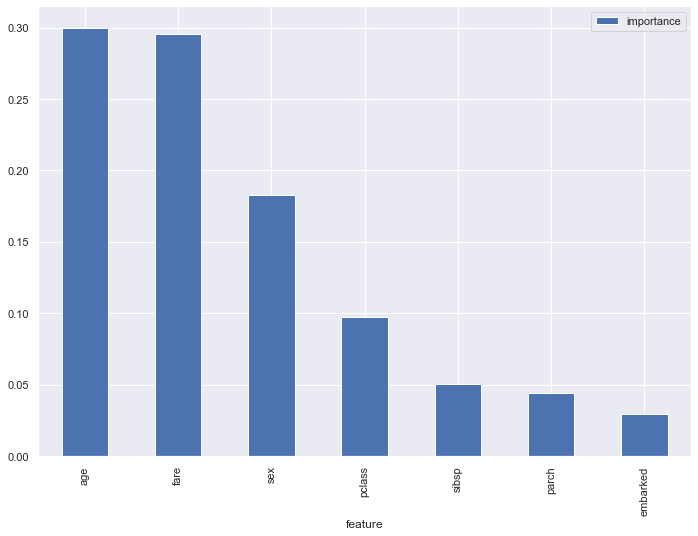

In [54]:
#visualize the important
importances.plot.bar()

In [55]:
#print the prediction of the random forest
pred = model[6].predict(X_test)
print(pred)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]


In [56]:
my_info = [[1,1,21,1,1,1,1]]



from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

my_survival = sc.fit_transform(my_info)

pred = model[6].predict(my_survival)

if pred == 0:
    print("died")
else:
    print("alive")

died
